# Lecture 8
- Central limit theorem

In [1]:

import numpy as np
import numpy.random as npr
import random
import itertools

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')

import scipy.stats as stats

In [2]:
# For the simple motivating example
import matplotlib.ticker as ticker  # Import ticker for formatting


# First, can we use simulation to solve this question?
A machine process parts, one at a time, in a time independently and uniformly distributed in [1,5]. 
What is the probability the machine processes at least 100 parts in 320 time units? 

In [5]:
n=100 # the total number of parts.

# define the random variable for the time needed for processing one part.
X = stats.uniform(loc =1, scale = 4)
mu = X.mean()
sigma = X.std()# standard deviation, recall variance = sigma**2
mu, sigma

(3.0, 1.1547005383792515)

In [7]:
# todo implement a simulation to compute the probability
num_sims = 10_000 
count=0
for i in range(num_sims):
    Xseq = X.rvs(size = n)
    if np.sum(Xseq) <= 320: 
        count += 1
print("The relative frequency of processing at least 100 parts in 320 time unit", count/num_sims)

The relative frequency of processing at least 100 parts in 320 time unit 0.9571


In [8]:
def getSn(n): 
    num_sims = 10_000
    Sn = np.zeros(num_sims)
    for i in range(num_sims):
        Xseq = X.rvs(size = n)
        Sn[i] = np.sum(Xseq)
    return Sn

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 5.000e+00,
        1.500e+01, 3.200e+01, 6.300e+01, 1.430e+02, 2.420e+02, 3.800e+02,
        5.670e+02, 7.760e+02, 9.840e+02, 1.106e+03, 1.195e+03, 1.142e+03,
        1.032e+03, 8.310e+02, 5.590e+02, 4.100e+02, 2.450e+02, 1.360e+02,
        7.200e+01, 3.200e+01, 1.300e+01, 9.000e+00, 1.000e+00, 6.000e+00]),
 array([2820.94946845, 2831.77160139, 2842.59373432, 2853.41586726,
        2864.2380002 , 2875.06013314, 2885.88226608, 2896.70439901,
        2907.52653195, 2918.34866489, 2929.17079783, 2939.99293077,
        2950.81506371, 2961.63719664, 2972.45932958, 2983.28146252,
        2994.10359546, 3004.9257284 , 3015.74786134, 3026.56999427,
        3037.39212721, 3048.21426015, 3059.03639309, 3069.85852603,
        3080.68065897, 3091.5027919 , 3102.32492484, 3113.14705778,
        3123.96919072, 3134.79132366, 3145.61345659]),
 <BarContainer object of 30 artists>)

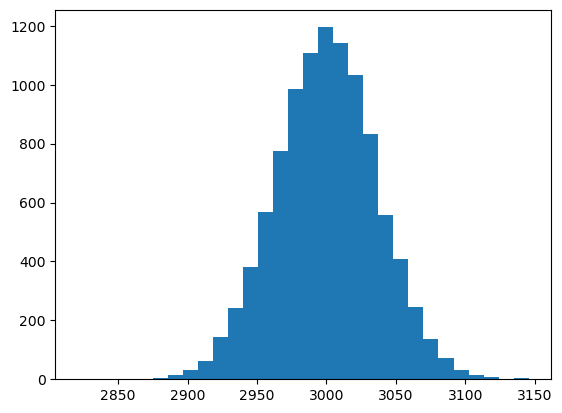

In [12]:
Sn = getSn(1000)
plt.hist(Sn, bins = 30, label='Sn[i]')

In [15]:
def getSnMnZn(n): 
    num_sims = 10_000
    Sn = np.zeros(num_sims)
    Mn = np.zeros(num_sims)
    Zn = np.zeros(num_sims)
    for i in range(num_sims):
        Xseq=  X.rvs(n) 
        Sn[i] =  np.sum(Xseq)
        Mn[i] =  Sn[i]/n
        Zn[i] =  (Sn[i] - n*mu)/(sigma*np.sqrt(n))
    return Sn, Mn, Zn

(array([3.79008239e-04, 0.00000000e+00, 0.00000000e+00, 2.27404943e-03,
        3.03206591e-03, 4.16909063e-03, 1.21282636e-02, 2.99416509e-02,
        4.66180134e-02, 7.88337137e-02, 1.31515859e-01, 1.73964782e-01,
        2.34606100e-01, 2.95247418e-01, 3.46792539e-01, 3.77492206e-01,
        4.18046087e-01, 3.78250222e-01, 3.46792539e-01, 2.90320311e-01,
        2.21340812e-01, 1.50087263e-01, 1.04985282e-01, 6.48104088e-02,
        3.60057827e-02, 2.34985108e-02, 1.06122307e-02, 4.92710711e-03,
        2.65305767e-03, 7.58016478e-04]),
 array([-4.32388547, -4.06003897, -3.79619246, -3.53234595, -3.26849944,
        -3.00465294, -2.74080643, -2.47695992, -2.21311342, -1.94926691,
        -1.6854204 , -1.42157389, -1.15772739, -0.89388088, -0.63003437,
        -0.36618787, -0.10234136,  0.16150515,  0.42535166,  0.68919816,
         0.95304467,  1.21689118,  1.48073768,  1.74458419,  2.0084307 ,
         2.27227721,  2.53612371,  2.79997022,  3.06381673,  3.32766323,
         3.59150

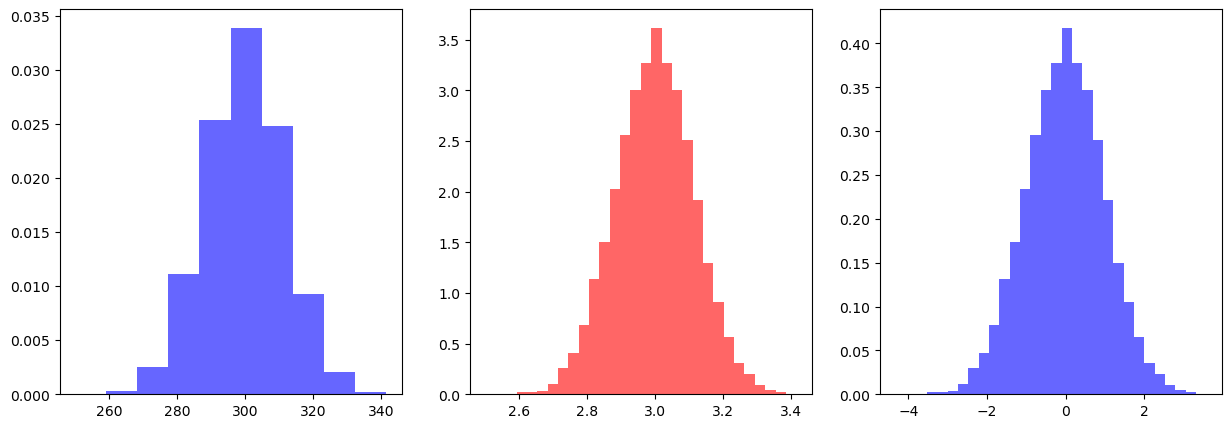

In [16]:
#PLOTING
Sn, Mn, Zn = getSnMnZn(100)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

axes[0].hist(Sn, density=True, alpha=0.6, color='blue', label='Sn[i]')
axes[1].hist(Mn, bins=30, density=True, alpha=0.6, color='red', label='Mn[i]')
axes[2].hist(Zn, bins=30, density=True, alpha=0.6, color='blue', label='Zn[i]')


In [ ]:
from ipywidgets import interactive

In [ ]:
def uplotMn(n):
    _, Mn, _ = getSnMnZn(n)
    plt.hist(Mn, bins=30)
    plt.xlim(-0.1, 6)
    
interactive_plot = interactive(uplotMn, n=100)
interactive_plot

In [ ]:
def uplotSn(n):
    Sn,_, _ = getSnMnZn(n)
    plt.hist(Sn, bins=30)
    plt.xlim(-0.1,2500)
    
interactive_plot = interactive(uplotSn, n=100)
interactive_plot

In [ ]:
def uplotZn(n):
    _,_, Zn = getSnMnZn(n)
    plt.hist(Zn, bins=30)
    plt.xlim(-5,5)
    
interactive_plot = interactive(uplotZn, n=100)
interactive_plot

## Revisit our problem

A machine process parts, one at a time, in a time independently and uniformly distributed in [1,5]. 
What is the probability the machine processes at least 100 parts in 320 time units? 

## Example: customer support

A call center receives customer calls according to an exponential distribution with a mean wait time of 4 minutes.
Questions:
1. If a single customer calls, what is the probability that they wait more than 5 minutes?
2. If we take a random sample of 40 customers, what is the probability that their average wait time is more than 5 minutes? 

## Polling

$p$: The fraction of population that will vote "yes".

$X_i$: The i-th person's vote 

* What random variable $X_i$ is?

$n$: the number of samples we collect .

$M_n$: The fraction of "Yes" in the sample.

Question: What is the number of samples we need to collect so that 
$P(|M_n- p|\le 0.01)<0.05$

In [ ]:
# FIND THE NUMBER OF SAMPLES.